In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout, Add
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


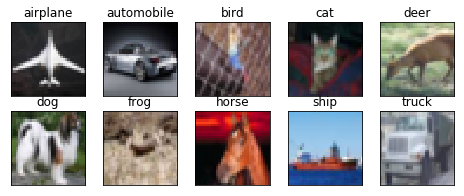

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
# Define the model
model = Sequential()

#32
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
#32
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
#16
model.add(MaxPooling2D(pool_size=(2, 2)))
#16
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
#16
model.add(Convolution2D(192, 3, 3,  border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
#8
model.add(MaxPooling2D(pool_size=(2, 2)))
#8
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
#1
model.add(Convolution2D(10, 8, 8))
model.add(Flatten())
model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0702 15:21:53.289170 140438819268480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.
W0702 15:21:53.342856 140438819268480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0702 15:21:53.349932 140438819268480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0702 15:21:53.387657 140438819268480 deprecation_wrapper

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 96)        41568     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 96)        384       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 96)        0         
__________

In [9]:
# For retrieving the saved best results
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Defining checkpoints
from keras.callbacks import ModelCheckpoint
filepath="/content/gdrive/My Drive/Yuvaraj-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

Epoch 1/100
  1/390 [..............................] - ETA: 54s - loss: 0.0442 - acc: 0.9844

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


390/390 [==============================] - 44s 112ms/step - loss: 0.0398 - acc: 0.9866 - val_loss: 0.5945 - val_acc: 0.8412

Epoch 00001: val_acc improved from -inf to 0.84120, saving model to /content/gdrive/My Drive/Yuvaraj-01-0.84.hdf5
Epoch 2/100
390/390 [==============================] - 43s 111ms/step - loss: 0.0388 - acc: 0.9864 - val_loss: 0.6558 - val_acc: 0.8343

Epoch 00002: val_acc did not improve from 0.84120
Epoch 3/100
390/390 [==============================] - 43s 111ms/step - loss: 0.0397 - acc: 0.9864 - val_loss: 0.6529 - val_acc: 0.8352

Epoch 00003: val_acc did not improve from 0.84120
Epoch 4/100
390/390 [==============================] - 43s 111ms/step - loss: 0.0382 - acc: 0.9864 - val_loss: 0.6233 - val_acc: 0.8371

Epoch 00004: val_acc did not improve from 0.84120
Epoch 5/100
390/390 [==============================] - 43s 111ms/step - loss: 0.0357 - acc: 0.9875 - val_loss: 0.6527 - val_acc: 0.8344

Epoch 00005: val_acc did not improve from 0.84120
Epoch 6/100
3

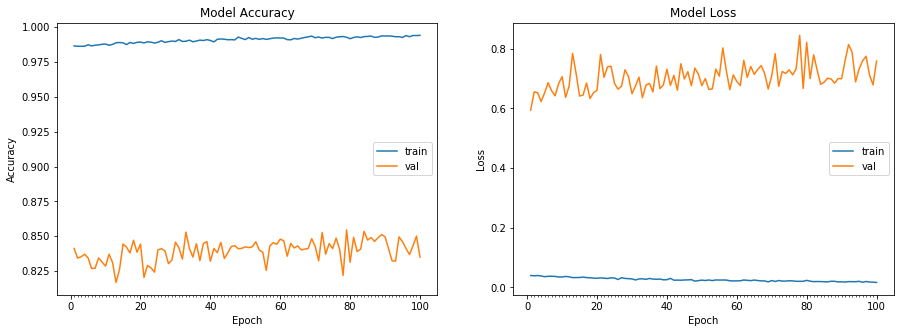

Accuracy on test data is: 83.50


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1,callbacks=callbacks_list)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
model.load_weights('/content/gdrive/My Drive/Yuvaraj-01-0.84.hdf5')

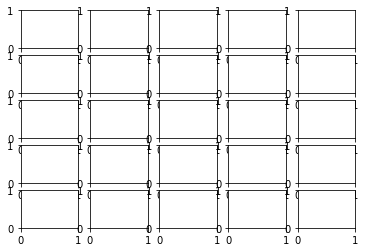

In [11]:
import matplotlib.pyplot as plt
plt.figure(0)
for i in range(5):
    for j in range(5):
        plt.subplot2grid((5,5), (i,j))
plt.show()

In [0]:
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

In [0]:
predicted_classes = model.predict_classes(test_features)

In [14]:
print(predicted_classes)
print(len(predicted_classes))

[1 0 0 ... 3 1 0]
10000


In [15]:
test_labels.shape

(10000, 1)

In [0]:
test_labels = test_labels.reshape(10000,)

In [17]:
incorrect = np.nonzero(predicted_classes!=test_labels)
print(incorrect)

(array([   0,    1,    2, ..., 9995, 9997, 9999]),)


In [18]:
arincorr = incorrect[0][0:25]
#arincorr = arincorr.tolist()
arincorr

array([ 0,  1,  2,  4,  5,  6,  7,  8, 11, 12, 14, 15, 16, 17, 18, 19, 20,
       22, 23, 24, 25, 26, 28, 29, 30])

0
1
2
4
5
6
7
8
11
12
14
15
16
17
18
19
20
22
23
24
25
26
28
29
30


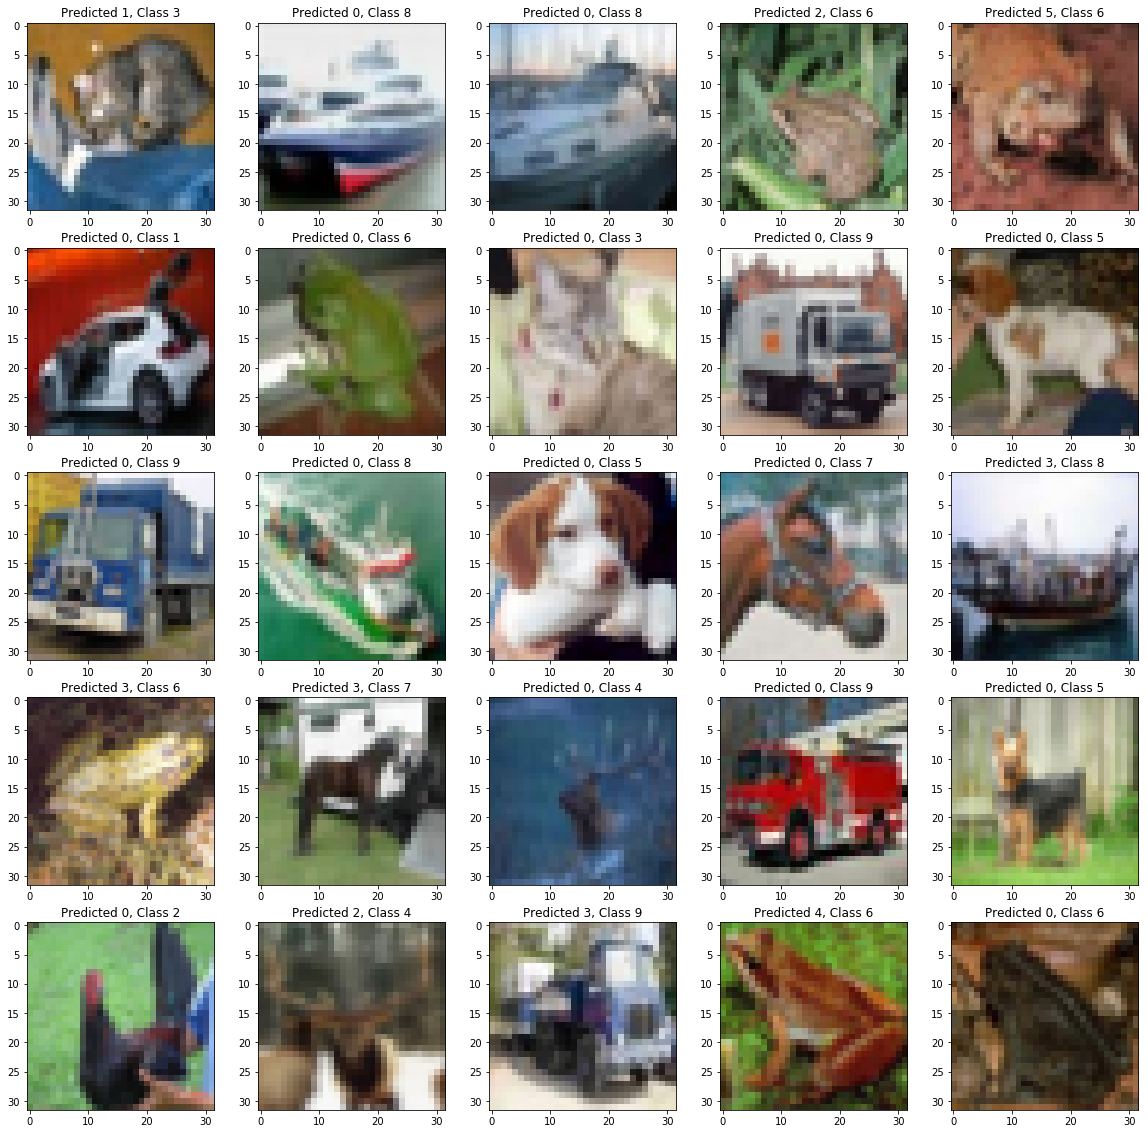

In [19]:
import matplotlib.pyplot as plt
import numpy as np 

#plt.figure(0)

plt.figure(figsize = (20,20))
plots = []
count = 0
for i in range(5):
    for j in range(5):
        ax = plt.subplot2grid((5,5), (i,j))
        print(arincorr[count])
        plt.imshow(test_features[arincorr[count]].reshape(32,32,3),cmap='gray',interpolation='none')
        plt.title("Predicted {}, Class {}".format(predicted_classes[arincorr[count]], test_labels[arincorr[count]]))
        count = count+1
plt.show()

In [0]:
misclassified_array=[5,7,15,20]

In [0]:
from keras.preprocessing import image
import cv2

In [0]:
def gradcam(image_number):
  (train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
  test_features = test_features.astype('float32')/255
  test_labels = np_utils.to_categorical(test_labels, num_classes)  
  img = test_features[image_number]
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  #x = preprocess_input(x)  
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("conv2d_5") 
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(192):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]    
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)  
  (train_features, train_labels), (test_features, test_labels) = cifar10.load_data()  
  img = test_features[image_number]
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  plt.imshow(img)
  plt.show()
  plt.imshow(superimposed_img)
  plt.show()
  cv2.waitKey(0)

In [23]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

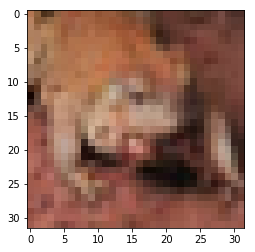

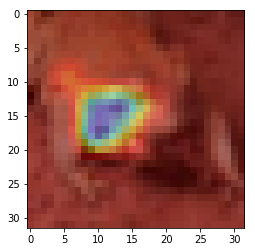

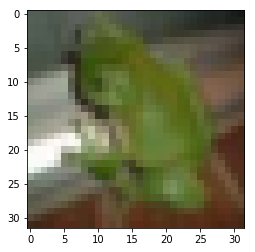

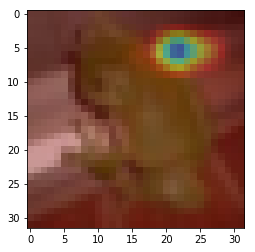

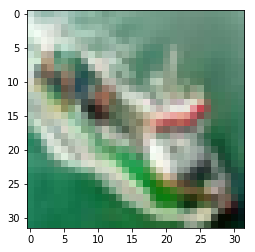

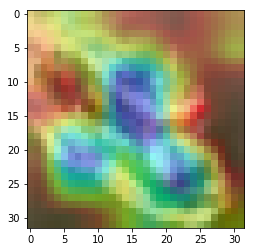

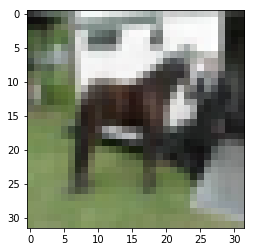

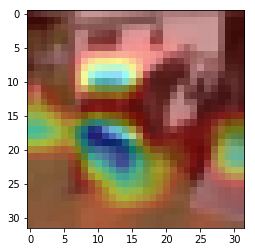

In [24]:
for n in misclassified_array:
  gradcam(n)

##CutOut

In [25]:
!wget https://raw.githubusercontent.com/yu4u/cutout-random-erasing/master/random_eraser.py
from random_eraser import get_random_eraser

--2019-07-02 15:24:51--  https://raw.githubusercontent.com/yu4u/cutout-random-erasing/master/random_eraser.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 888 [text/plain]
Saving to: ‘random_eraser.py’

random_eraser.py    100%[===================>]     888  --.-KB/s    in 0s      

2019-07-02 15:24:51 (125 MB/s) - ‘random_eraser.py’ saved [888/888]



In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

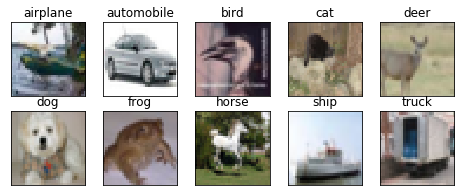

In [27]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [31]:
# Define the model
model = Sequential()

#32
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
#32
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
#16
model.add(MaxPooling2D(pool_size=(2, 2)))
#16
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
#16
model.add(Convolution2D(192, 3, 3,  border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
#8
model.add(MaxPooling2D(pool_size=(2, 2)))
#8
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
#1
model.add(Convolution2D(10, 8, 8))
model.add(Flatten())
model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWa

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 96)        41568     
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 96)        384       
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 96)        0         
__________

In [32]:
# For retrieving the saved best results
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# Defining checkpoints
from keras.callbacks import ModelCheckpoint
filepath="/content/gdrive/My Drive/Yuvaraj9b-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`
  # This is added back by InteractiveShellApp.init_path()
W0701 16:06:24.385629 140227723196288 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_d

Epoch 1/100
390/390 [==============================] - 24s 61ms/step - loss: 1.6389 - acc: 0.4460 - val_loss: 1.4897 - val_acc: 0.4957

Epoch 00001: val_acc improved from -inf to 0.49570, saving model to /content/gdrive/My Drive/Yuvaraj9b-01-0.50.hdf5
Epoch 2/100
390/390 [==============================] - 22s 56ms/step - loss: 1.0592 - acc: 0.6252 - val_loss: 0.9807 - val_acc: 0.6561

Epoch 00002: val_acc improved from 0.49570 to 0.65610, saving model to /content/gdrive/My Drive/Yuvaraj9b-02-0.66.hdf5
Epoch 3/100
390/390 [==============================] - 21s 55ms/step - loss: 0.8851 - acc: 0.6895 - val_loss: 0.9116 - val_acc: 0.6741

Epoch 00003: val_acc improved from 0.65610 to 0.67410, saving model to /content/gdrive/My Drive/Yuvaraj9b-03-0.67.hdf5
Epoch 4/100
390/390 [==============================] - 21s 55ms/step - loss: 0.7878 - acc: 0.7232 - val_loss: 1.0863 - val_acc: 0.6177

Epoch 00004: val_acc did not improve from 0.67410
Epoch 5/100
390/390 [==============================]

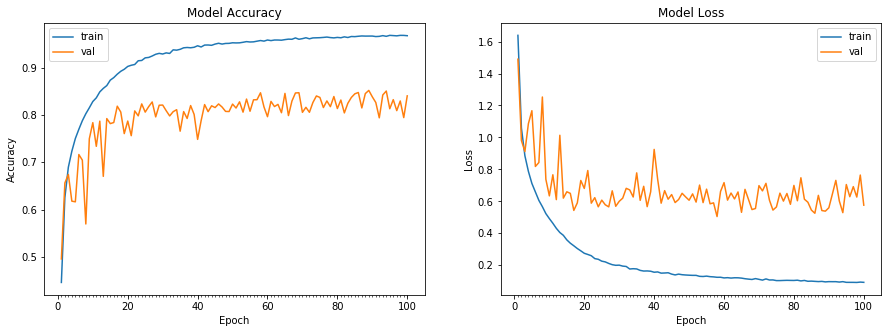

Accuracy on test data is: 84.01


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, horizontal_flip=False,preprocessing_function=get_random_eraser(v_l=0, v_h=1))


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1,callbacks=callbacks_list)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [35]:
filepath

'/content/gdrive/My Drive/Yuvaraj9b-{epoch:02d}-{val_acc:.2f}.hdf5'

In [0]:
model.load_weights('/content/gdrive/My Drive/Yuvaraj9b-89-0.85.hdf5')

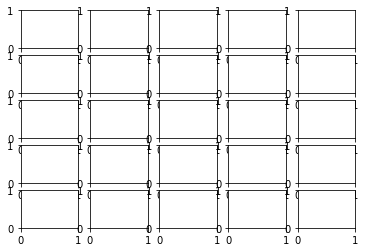

In [38]:
import matplotlib.pyplot as plt
plt.figure(0)
for i in range(5):
    for j in range(5):
        plt.subplot2grid((5,5), (i,j))
plt.show()

In [0]:
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

In [0]:
predicted_classes = model.predict_classes(test_features)

In [41]:
test_labels.shape

(10000, 1)

In [0]:
test_labels = test_labels.reshape(10000,)

In [43]:
incorrect = np.nonzero(predicted_classes!=test_labels)
print(incorrect)

(array([   0,    1,    2, ..., 9996, 9997, 9999]),)


In [44]:
arincorr = incorrect[0][0:25]
#arincorr = arincorr.tolist()
arincorr

array([ 0,  1,  2,  3,  4,  5,  7,  8, 11, 12, 13, 14, 16, 17, 18, 19, 20,
       22, 23, 24, 25, 26, 28, 29, 30])

0
1
2
3
4
5
7
8
11
12
13
14
16
17
18
19
20
22
23
24
25
26
28
29
30


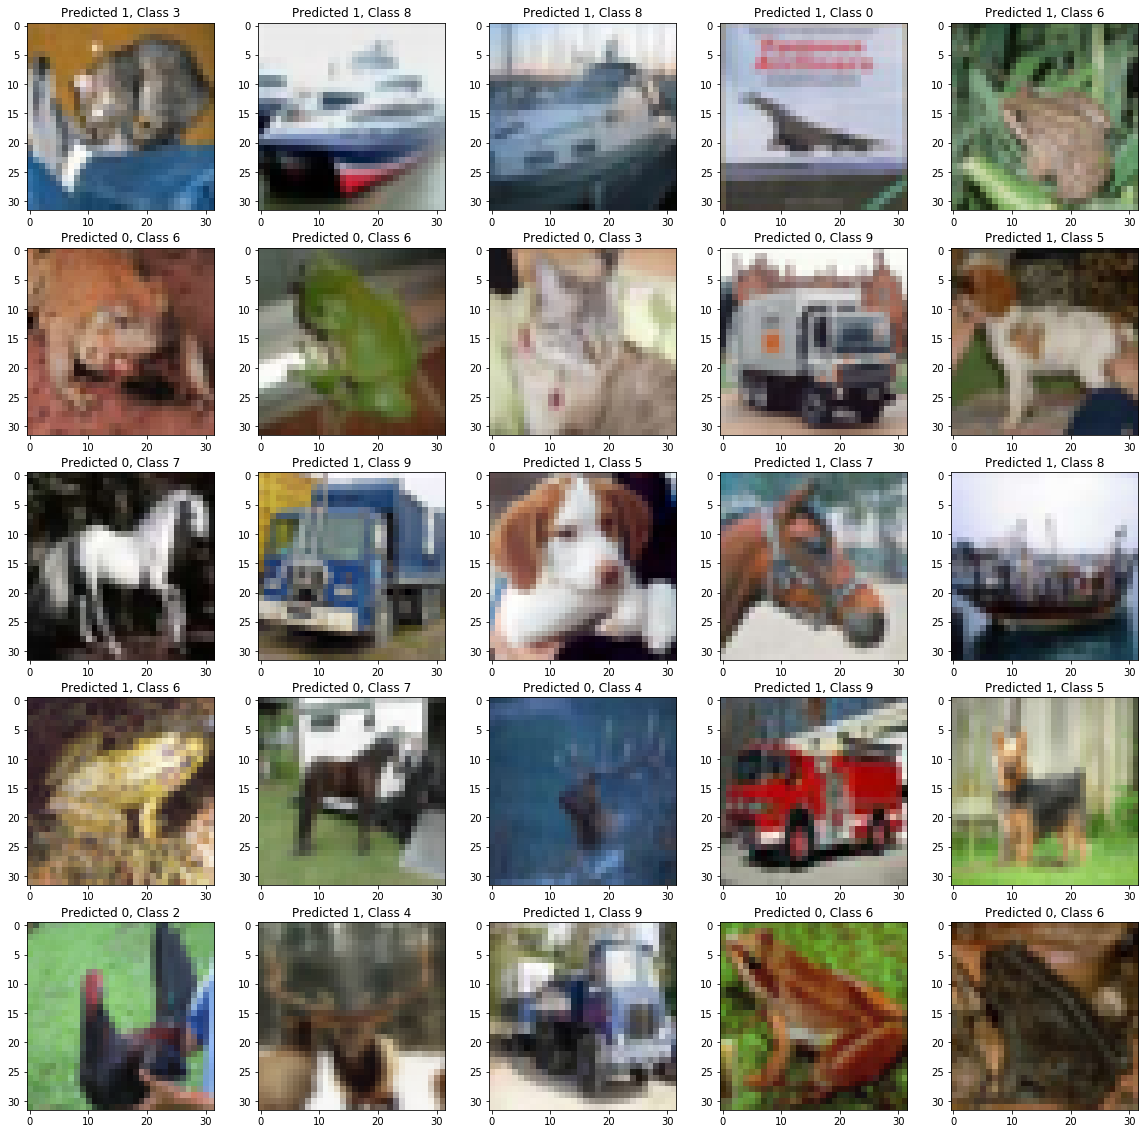

In [45]:
import matplotlib.pyplot as plt
import numpy as np 

#plt.figure(0)

plt.figure(figsize = (20,20))
plots = []
count = 0
for i in range(5):
    for j in range(5):
        ax = plt.subplot2grid((5,5), (i,j))
        print(arincorr[count])
        plt.imshow(test_features[arincorr[count]].reshape(32,32,3),cmap='gray',interpolation='none')
        plt.title("Predicted {}, Class {}".format(predicted_classes[arincorr[count]], test_labels[arincorr[count]]))
        count = count+1
plt.show()

In [0]:
misclassified_array=[5,7,15,20]

In [0]:
from keras.preprocessing import image
import cv2

In [0]:
def gradcam(image_number):
  (train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
  test_features = test_features.astype('float32')/255
  test_labels = np_utils.to_categorical(test_labels, num_classes)  
  img = test_features[image_number]
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  #x = preprocess_input(x)  
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("conv2d_11") 
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(192):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]    
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)  
  (train_features, train_labels), (test_features, test_labels) = cifar10.load_data()  
  img = test_features[image_number]
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  plt.imshow(img)
  plt.show()
  plt.imshow(superimposed_img)
  plt.show()
  cv2.waitKey(0)

In [49]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'invalid': 'ignore', 'over': 'warn', 'under': 'ignore'}

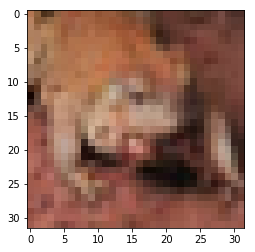

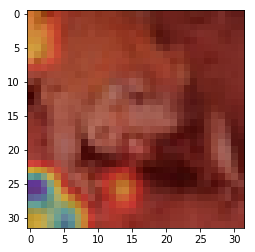

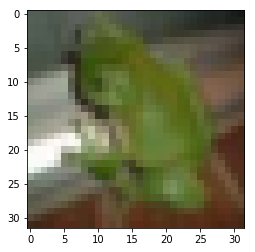

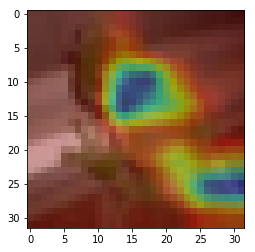

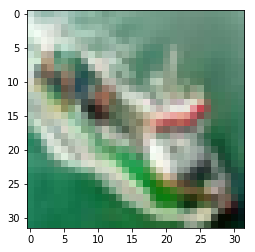

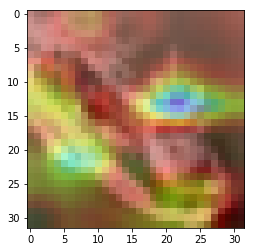

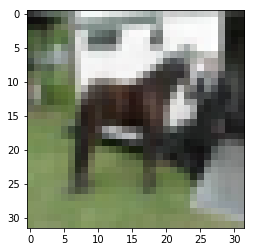

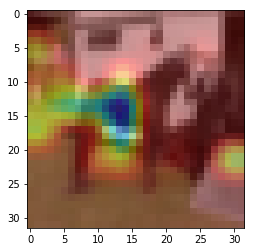

In [52]:
for n in misclassified_array:
  gradcam(n)